<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


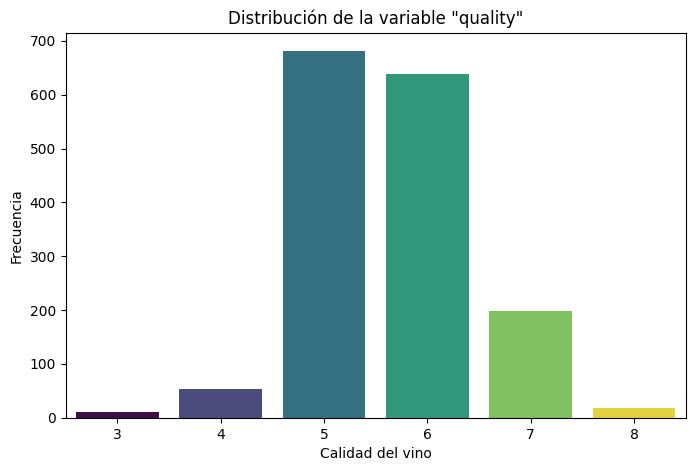

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("winequality-red.csv")

# Vista general de los datos
df.info()
df.describe()

# Distribución de la variable objetivo
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, hue='quality', palette='viridis', legend=False)
plt.title('Distribución de la variable "quality"')
plt.xlabel('Calidad del vino')
plt.ylabel('Frecuencia')
plt.show()

In [6]:
# Verificación de valores nulos
print(df.isnull().sum())

# Separación de variables predictoras y objetivo
X = df.drop("quality", axis=1)
y = df["quality"]

# Escalado de características
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selección de las 8 mejores características
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X_scaled, y)

# Nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_features))

Características seleccionadas: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [8]:
from sklearn.model_selection import train_test_split

# División usando solo las variables seleccionadas
X_selected = pd.DataFrame(X_new, columns=selected_features)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento del modelo
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Reporte de clasificación:

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.60      0.75      0.67       130
           6       0.52      0.51      0.51       132
           7       0.43      0.31      0.36        42
           8       1.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.76      0.26      0.26       320
weighted avg       0.57      0.55      0.53       320



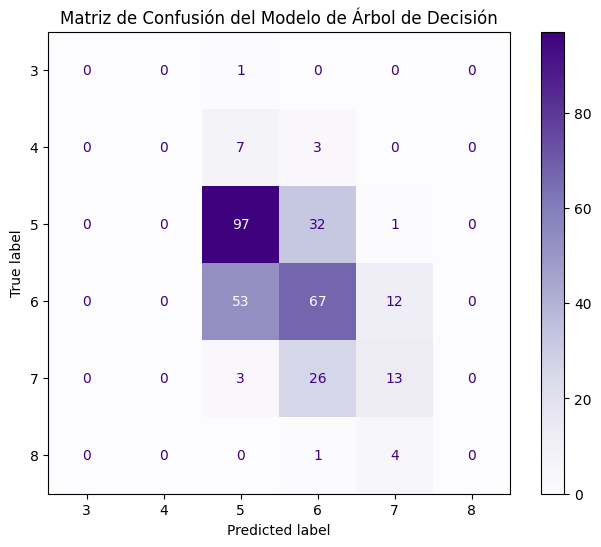

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones del modelo sobre los datos de prueba
y_pred = tree_model.predict(X_test)

# Evaluación del rendimiento
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, zero_division=1))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(df['quality'].unique()))
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, cmap='Purples')
plt.title("Matriz de Confusión del Modelo de Árbol de Decisión")
plt.show()

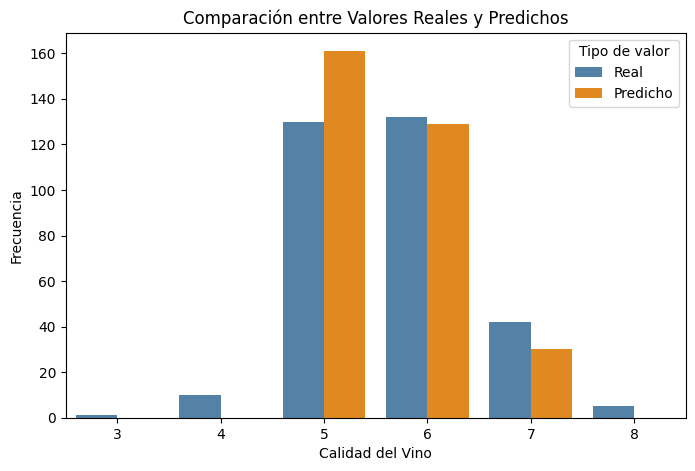

C:\Users\Caraxes\AppData\Local\Temp\ipykernel_8268\2495215357.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=feature_df, palette='viridis')


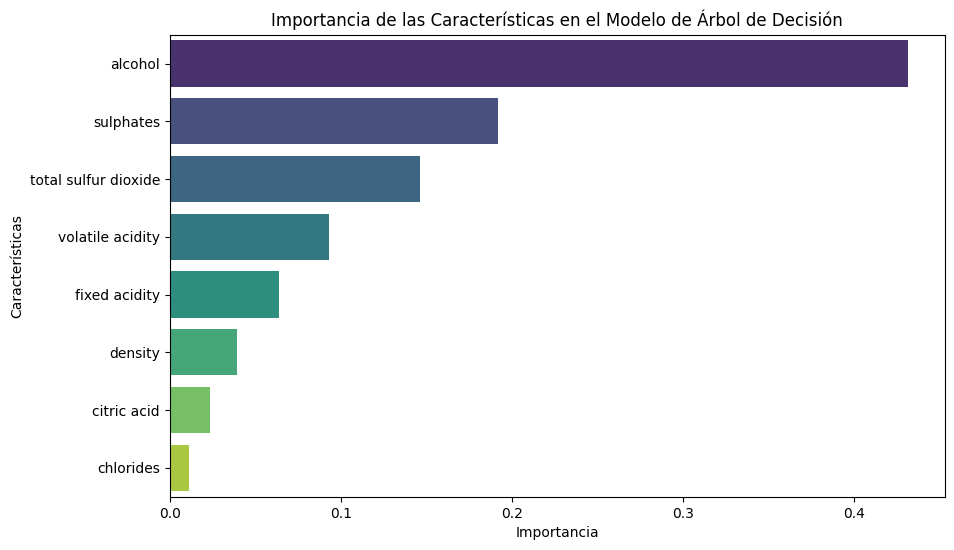

In [18]:
# Crear DataFrame con valores reales y predichos
resultados = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})

# Figura 7.1 - Comparación entre valores reales y predichos
plt.figure(figsize=(8,5))

# Añadir una columna para facilitar el conteo
resultados_melt = resultados.melt(var_name='Tipo', value_name='Calidad')

sns.countplot(data=resultados_melt, x='Calidad', hue='Tipo', palette=['steelblue', 'darkorange'])
plt.title("Comparación entre Valores Reales y Predichos")
plt.xlabel("Calidad del Vino")
plt.ylabel("Frecuencia")
plt.legend(title='Tipo de valor')
plt.show()

# Figura 7.2 - Importancia de características
importances = tree_model.feature_importances_
features = X_train.columns
feature_df = pd.DataFrame({'Característica': features, 'Importancia': importances})
feature_df = feature_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Característica', data=feature_df, palette='viridis')
plt.title("Importancia de las Características en el Modelo de Árbol de Decisión")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()